Establish a relationship between:
1. price and house size
2. price and views - *done*
3. price and condition

Overall Questions:
1. What is the biggest influence on price?
2. Are more expensive houses an easier sell?

Increasing Views:
1. Views vs Price
2. Views vs Grade
3. Views cs condition

House Specs:
1. Size of living space vs Size of lot
2. Floors vs living space
3. House condition vs grade
4. How recently revovated vs views 

In [361]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import random
%matplotlib inline

In [362]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [363]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #Interquartile range
   fence_low  = q1 - 1.5*iqr
   fence_high = q3 + 1.5*iqr
   df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
   return df_out

In [364]:
price_drop = remove_outlier(df, 'price').index
df.drop(index= price_drop, inplace= True)

sqft_living_drop = remove_outlier(df, 'sqft_living').index
df.drop(index= sqft_living_drop, inplace= True)

sqft_living15_drop = remove_outlier(df, 'sqft_living15').index
df.drop(index= sqft_living15_drop, inplace= True)

sqft_lot_drop = remove_outlier(df, 'sqft_lot').index
df.drop(index= sqft_lot_drop, inplace= True)

sqft_lot15_drop = remove_outlier(df, 'sqft_lot15').index
df.drop(index= sqft_lot15_drop, inplace= True)

In [365]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [366]:
df.dropna(subset=['view'], how='all', inplace=True)

In [367]:
df.drop(columns='waterfront', axis=1, inplace= True)

In [368]:
df['date'] = pd.to_datetime(df['date'])

In [369]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,4,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000


In [287]:
# display(df.info())
# df.describe()

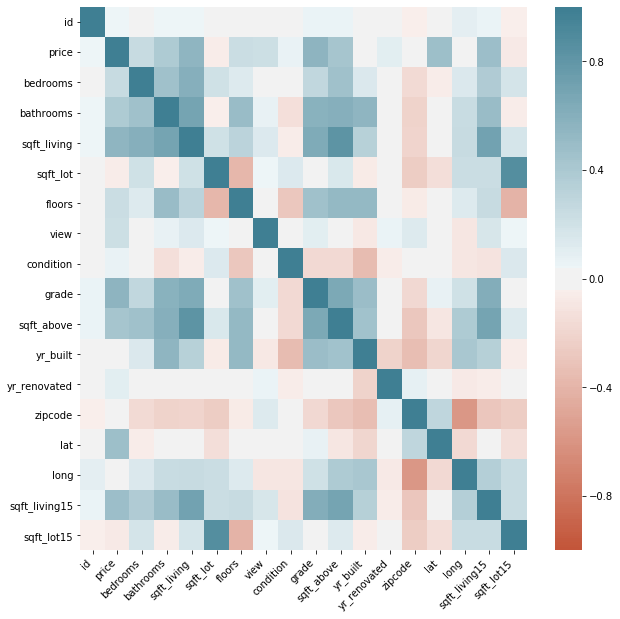

In [338]:
corr = df.corr()

plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [197]:
# df2 = df[['sqft_lot','sqft_living','sqft_lot15','sqft_living15']]
# df2

In [198]:
# df.isna().any()

In [199]:
# df.isna().sum()

In [200]:
# df.isnull().sum()

In [ ]:
height = df['price']
bars = df['view']
 
plt.bar(bars, height)
 
plt.show()
 

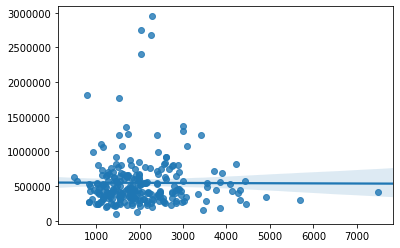

In [216]:
x = random.sample(list(df['sqft_living']), k=250)
y = random.sample(list(df['price']), k=250)

sns.regplot(x, y)
plt.show()


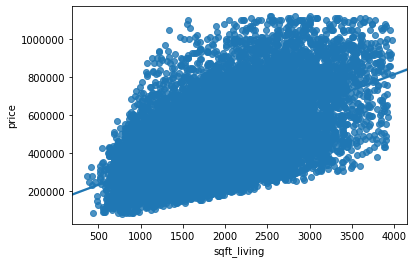

In [370]:
x = df['sqft_living']
y = df['price']

sns.regplot(x, y)
plt.show()

<BarContainer object of 21534 artists>

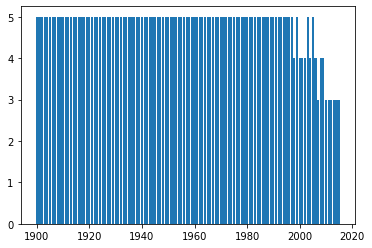

In [289]:
x = df['yr_built']
y = df['condition']
 
plt.bar(x, y) 

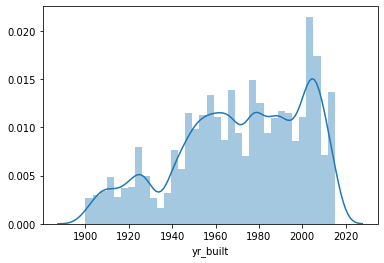

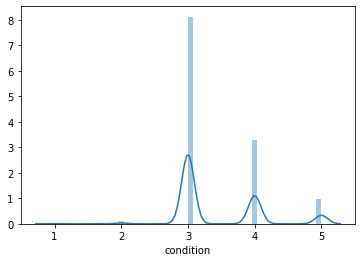

In [257]:
x = df['yr_built']
y = df['condition']
 
sns.distplot(x)
plt.show()

sns.distplot(y)
plt.show()


In [ ]:
x = df['sqft_living']
y = df['sqft_lot']

sns.regplot(x , y)
plt.show()

In [ ]:
import folium

def generateBaseMap(default_location=[47.6062, -122.3321], default_zoom_start=12):
   base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
   return base_map

generateBaseMap()

In [ ]:
sns.distplot( df['sqft_living'], rug = True )
plt.show()

In [ ]:
house_lot_plot = sns.pairplot(df,
                             vars=['sqft_lot','sqft_living','sqft_lot15','sqft_living15', 'yr_built'
                                  ])
plt.show()

In [ ]:
bedrooms_bathrooms_floors_plot = sns.pairplot(df,
                                              vars=['bedrooms','bathrooms', 'floors','price'
                                              ])
plt.show()

In [ ]:
house_lot_plot = sns.pairplot(df,
                 vars=['bedrooms','bathrooms', 'sqft_lot', 'sqft_living'
                      ])
plt.show()

In [ ]:
x = random.sample(list(df['bathrooms']), k=250)
y = random.sample(list(df['price']), k=250)

plt.bar(x, y)
plt.show()

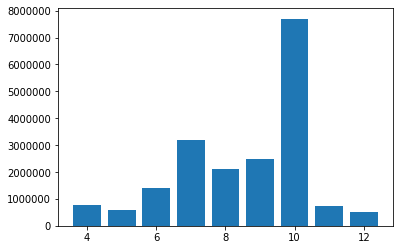

In [28]:
x = random.sample(list(df['grade']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

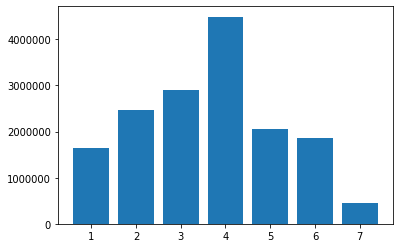

In [24]:
x = random.sample(list(df['bedrooms']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

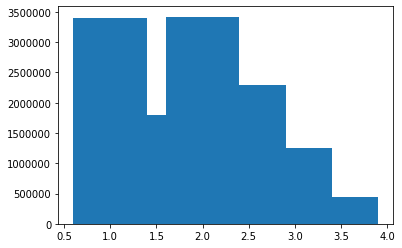

In [25]:
x = random.sample(list(df['floors']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

In [89]:
len(df['zipcode'].unique())

70

In [386]:
data_df = df[(df['grade'] >=8) & (df['condition'] >=4) & (df['bedrooms'] >=2)]
data_df.groupby(['zipcode','grade'])

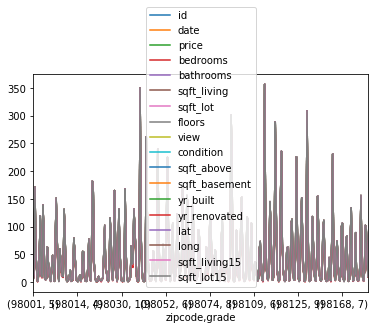

In [398]:
df2 = df.groupby(['zipcode','grade']).count().plot()

In [268]:
df['price'].max()

7700000.0

In [260]:
# zip_grade_df.sort_values(by = 'price', ascending = True)

In [ ]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)


model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))


f = 'something~something'
model = sm.ols(formula = f, data = df).fit()
model.summary()

In [232]:
x = df['sqft_living']
y = df['price']
X = sm.add_constant(x)
print(X.shape, x.shape, y.shape)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

(21534, 2) (21534,) (21534,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:30:24   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
x = df['sqft_living']
y = df['bathrooms']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bathrooms   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 2.859e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:23:45   Log-Likelihood:                -15789.
No. Observations:               21534   AIC:                         3.158e+04
Df Residuals:                   21532   BIC:                         3.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7997      0.009     94.018      0.000       0.783       0.816
sqft_living     0.0006   3.74e-06    169.098      0.000       0.001       0.001
==============================================================================
Omnibus:                      742.201   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.353
Skew:                           0.320   Prob(JB):                    4.02e-258
Kurtosis:                       3.954   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [261]:
x = df['sqft_living15']
y = df['grade']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 2.232e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:23:28   Log-Likelihood:                -26325.
No. Observations:               21534   AIC:                         5.265e+04
Df Residuals:                   21532   BIC:                         5.267e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2319      0.017    304.662      0.000       5.198       5.266
sqft_living15     0.0012   8.17e-06    149.412      0.000       0.001       0.001
==============================================================================
Omnibus:                     1306.635   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3453.913
Skew:                           0.343   Prob(JB):                         0.00
Kurtosis:                       4.838   Cond. No.                     6.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([2.14285714, 0.25      ])

In [231]:
# jp = sns.pairplot(data=df,
#                  x_vars=['zipcode'],
#                  y_vars=['sqft_living'],
#                  height=4.5,
#                  hue='price',
#                  palette={'red', 'white'},
#                  plot_kws=dict(edgecolor='k', linewidth=0.5))